# Tests de permutation de Fisher
# 20 juillet 2021
# @author : jeremylhour

In [1]:
rm(list=ls())

packageList = c('MASS', 'ggplot2', 'gridExtra')
#for(pack in packageList) install.packages(pack)
lapply(packageList, require, character.only = TRUE)

Loading required package: MASS

Loading required package: ggplot2

Loading required package: gridExtra



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

In [2]:
print(paste(rep("=", 80), collapse=""))
print("DEFINITION DES FONCTIONS")
print(paste(rep("=", 80), collapse=""))

theta.iter = function(D, Y, Dstar, C=0){
    #' Calcule l'ATE
    
    #' @param D (vector): assignation observée au traitement
    #' @param Y (vector): vecteur des résultats
    #' @param Dstar (vector): nouvelle assignation au traitement
    #' @param C (double): constante dans l'hypothèse de test
    
    ChangeTreat = (Dstar!=D) # identifie ceux qui ont changé de statut
    # Si pas de changement de statut, Ystar = Y
    Ystar = Y 
    # En revanche, si changement de statut alors les anciens traités se retrouvent avec Y-C, et les anciens non-traités avec Y+C
    Ystar[ChangeTreat] = Y[ChangeTreat] + (1 - 2*D[ChangeTreat])*C
    return(mean(Ystar[Dstar==1]) - mean(Ystar[Dstar==0]))
}

compute.pval = function(theta.obs, theta.sim, C=0){
    #' Calcule la p-value 
    B = length(theta.sim) 
    return((1 + sum(abs(theta.sim-C)>abs(theta.obs-C)))/(B+1))
}

[1] "================================================================================"
[1] "DEFINITION DES FONCTIONS"
[1] "================================================================================"


In [3]:
print(paste(rep("=", 80), collapse=""))
print("PARAMETRES")
print(paste(rep("=", 80), collapse=""))

set.seed(12071990)

# param
N = 200   # Nb. observations
pi = .2   # Probabilité d'être traité
B = 10000   # Nb. de permutations pour le test

C.val = seq(-3, 3, .1) # Valeurs à tester pour le calcul de l'intervalle de confiance

print(paste0("Nombre d'observations : ", N))
print(paste0("Probabilité d'être traité : ", pi))
print(paste0("Nombre de permutations pour le test : ", B))

[1] "================================================================================"
[1] "PARAMETRES"
[1] "================================================================================"
[1] "Nombre d'observations : 200"
[1] "Probabilité d'être traité : 0.2"
[1] "Nombre de permutations pour le test : 10000"


In [4]:
print(paste(rep("=", 80), collapse=""))
print("CAS 1 : IL Y A UN EFFET")
print(paste(rep("=", 80), collapse=""))

mu = 0.75 # effet du traitement

d = ifelse(runif(N) < pi, 1, 0)
y = d*mu + rnorm(N)

theta.hat = mean(y[d==1]) - mean(y[d==0])
print(paste0("Effet estimé : ", round(theta.hat, 3))) # Theta


Dpermut = replicate(B, sample(d)) # each column is a random permutation of d

theta.reshuffled = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=0), b=1:B)
p.val1 = compute.pval(theta.hat,theta.reshuffled,C=0)
print(paste0("p-value : ", round(p.val1,3)))

titer = data.frame(val=theta.reshuffled)
p1 = ggplot(titer, aes(x=val)) + 
  geom_histogram(binwidth = .01, alpha=.5, position='identity',fill="steelblue", aes(y = ..density..)) +
  scale_x_continuous(name="ATE estimé") +
  ggtitle(expression(tau*"=.75")) + 
  geom_vline(xintercept = theta.hat, colour="darkorchid3", size=1) +
  theme(plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")


p.vals1 = vector(length=length(C.val))
for(i in 1:length(C.val)){
  theta.sim = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=C.val[i]), b=1:B)
  p.vals1[i] = compute.pval(theta.hat,theta.sim,C=C.val[i])
}

[1] "================================================================================"
[1] "CAS 1 : IL Y A UN EFFET"
[1] "================================================================================"
[1] "Effet estimé : 0.671"
[1] "p-value : 0"


In [5]:
print(paste(rep("=", 80), collapse=""))
print("CAS 2 : PAS D'EFFET")
print(paste(rep("=", 80), collapse=""))

mu = 0

d = ifelse(runif(N) < pi,1,0)
y = d*mu + rnorm(N)

theta.hat = mean(y[d==1]) - mean(y[d==0])
print(paste0("Effet estimé : ", round(theta.hat, 3)))

Dpermut = replicate(B, sample(d)) # each column is a random permutation of d

theta.reshuffled = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=0), b=1:B)
p.val2 = compute.pval(theta.hat,theta.reshuffled,C=0)
                          
print(paste0("p-value : ", round(p.val2,3)))

titer = data.frame(val=theta.reshuffled)
p2 = ggplot(titer, aes(x=val)) + 
  geom_histogram(binwidth = .01, alpha=.5, position='identity',fill="steelblue", aes(y = ..density..)) +
  scale_x_continuous(name="ATE estimé") +
  ggtitle(expression(tau*"=0")) + 
  geom_vline(xintercept = theta.hat, colour="darkorchid3", size=1) +
  theme(plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")
                          
p.vals2 = vector(length=length(C.val))
for(i in 1:length(C.val)){
  theta.sim = mapply(function(b) theta.iter(d,y,Dpermut[,b],C=C.val[i]), b=1:B)
  p.vals2[i] = compute.pval(theta.hat,theta.sim,C=C.val[i])
}

[1] "================================================================================"
[1] "CAS 2 : PAS D'EFFET"
[1] "================================================================================"
[1] "Effet estimé : -0.225"
[1] "p-value : 0.271"


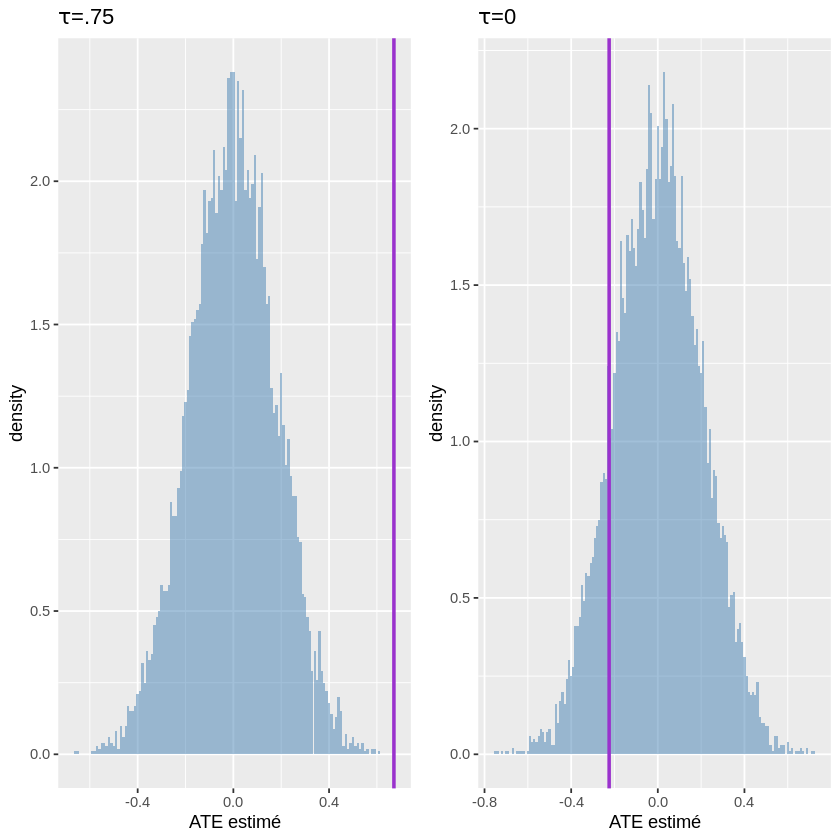

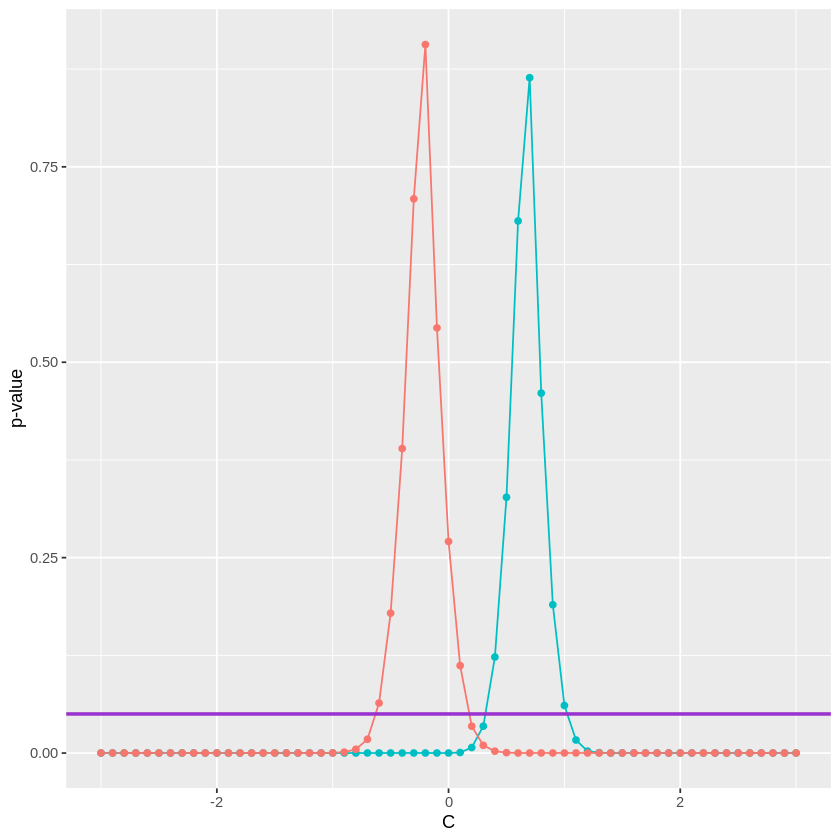

In [6]:
# Plot 1
grid.arrange(p1, p2, ncol=2)

# Plot 2
plotdata = data.frame(val1=p.vals1,val2=p.vals2,C=C.val)

ggplot(plotdata, aes(x=C.val)) + 
  geom_line(aes(y = val1, colour = "red")) +
  geom_line(aes(y = val2, colour = "blue")) +
  geom_point(aes(y = val1, colour = "red")) +
  geom_point(aes(y = val2, colour = "blue")) +
  geom_hline(yintercept = .05, colour="darkorchid3", size=1)+
  scale_x_continuous(name="C", limits=c(-3,3)) +
  scale_y_continuous(name="p-value") +
  theme(plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")

In [7]:
# SAUVEGARDE FIGURES

# Plot 1
jpeg("FisherTest.jpg", width = 1000, height = 500)
grid.arrange(p1, p2, ncol=2)
dev.off()

# Plot 2
plotdata = data.frame(val1=p.vals1,val2=p.vals2,C=C.val)

jpeg("p-val.jpg", width = 1000, height = 1000)
ggplot(plotdata, aes(x=C.val)) + 
  geom_line(aes(y = val1, colour = "red")) +
  geom_line(aes(y = val2, colour = "blue")) +
  geom_point(aes(y = val1, colour = "red")) +
  geom_point(aes(y = val2, colour = "blue")) +
  geom_hline(yintercept = .05, colour="darkorchid3", size=1)+
  scale_x_continuous(name="C", limits=c(-1.5,2.5)) +
  scale_y_continuous(name="p-value") +
  theme(plot.title = element_text(lineheight=.8, face="bold"),legend.position="none")
dev.off()

png 
  2

Warning message:
“Removed 20 row(s) containing missing values (geom_path).”
Warning message:
“Removed 20 row(s) containing missing values (geom_path).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”


png 
  2